<a href="https://colab.research.google.com/github/shushantbk16/ML_Deepdive/blob/main/DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Perceptron

(100, 2)


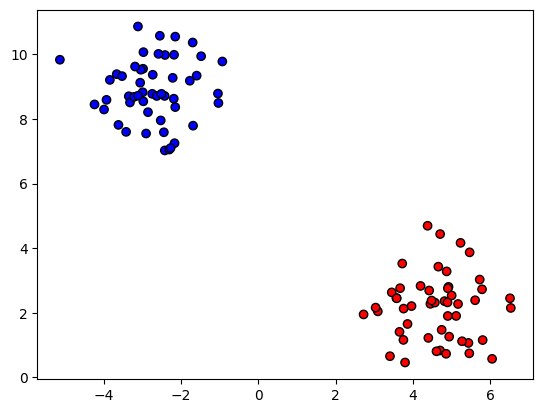

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=2, random_state=42)
y = y.reshape(-1, 1)  # Reshape for compatibility

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
print(X.shape)

In [ ]:
class Perceptron:
  def __init__(self,learning_rate,epochs):
    self.learning_rate=learning_rate
    self.epochs=epochs
    self.weights=None
    self.bias=None
  def a_f(self,z):
    return np.where(z>=1,1,0)
  def fit(self,X,y):
    n,m=X.shape
    self.weights=np.zeros((m,1))
    self.bias=0
    for _ in range(self.epochs):
      for idx,x_i in enumerate(X):
        l_output=np.dot(x_i,self.weights)+self.bias
        y_pred=self.a_f(l_output)
        update = self.learning_rate * (y[idx] - y_pred)
        self.weights += update * x_i.reshape(-1, 1)
        self.bias += update

  def predict(self, X):
        # Calculate linear output and apply activation function for predictions
        linear_output = np.dot(X, self.weights) + self.bias
        return self.a_f(linear_output)


In [ ]:
perceptron = Perceptron(learning_rate=0.01, epochs=1000)
perceptron.fit(X, y)

# Make predictions on the training data
y_pred = perceptron.predict(X)


In [ ]:
np.mean(y==y_pred)

np.float64(1.0)

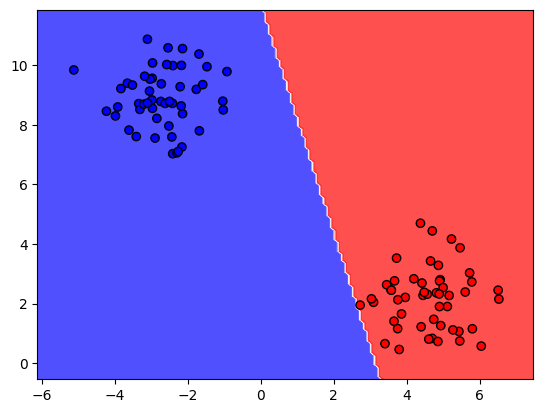

In [ ]:
x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, 0.1),
                       np.arange(x1_min, x1_max, 0.1))
# grid = np.c_[xx0.ravel(), xx1.ravel()]
# grid_preds = perceptron.predict(grid).reshape(xx0.shape)

# Plot decision boundary
plt.contourf(xx0, xx1, grid_preds, alpha=0.8, cmap='bwr')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='bwr')

## Backprop